<a href="https://colab.research.google.com/github/Zubrah/Deep-Learning-Spotify-recommendation/blob/master/Deep_Learning_Spotify_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# **Build a Song Recommender System using Content-Based Filtering in Python using Deep Learning Sigmoid Kernel and Similarity Cosines.**




**Introduction**


With the rapid growth in online and mobile platforms, lots of music platforms are coming into the picture. These platforms are offering songs lists from across the globe. Every individual has a unique taste for music. Most people are using Online music streaming platforms such as Spotify, Apple Music, Google Play, or Pandora.

Online Music listeners have lots of choices for the song. These customers sometimes get very difficult in selecting the songs or browsing the long list. The service providers need an efficient and accurate recommender system for suggesting relevant songs. As data scientists, we need to understand the patterns in music listening habits and predict the accurate and most relevant recommendations.


**Project Background ;**


Spotify is one of the newest innovations to have come to audio listening and experience with over 125 million subscribers. Though the service has recently begun it dominates Apple Music and Amazon music in the audio streaming market. From music, they have extended the audio service to Podcasts, Audiobooks, and so on. Spotify Trends helps any content creator/musician in order to understand what listeners prefer and how to compete in this immensely growing market. 

The two main purposes of this project are
1. **Build  Deep  Learning prediction model** 
—  To Predict Popularity of songs of any song by analyzing various metrics in the dataset. This Prediction helps any content creator/musician to understand what Spotify listeners prefer to hear more nowadays which is key in order to compete in the market.



2. **Build a spotify-content-based Recommendation** system that can suggest artists songs by tempo, danceability and popularity for any users. This helps users to listen to songs based on their music preferences.


EXPECTED APPROACH : 
- To attain the Objective it's important to start by doing Exploratory Analysis and achieve a few insights from data. Find out which features are highly correlated with the Popularity attribute. The next step is to test different model algorithms and pick the best model based on key evaluation metric (R2 Score)

- Then creating clusters to understand different songs attributes and learn how they can be used to create an efficient song recommendation system. 

- Feed the clusters and new data to the deep learning models here being similarity cosines and sigmoid kernel as part of deep learning approaches to create an efficient deep learning model.





In [31]:
# import neccessary libraries

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import sigmoid_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing


import matplotlib.pyplot as plt
plt.style.use("seaborn")
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Data 

The content-based filtering method is based on the analysis of item features. It determines which features are most important for suggesting the songs. 

For example, if the user has liked a song in the past and the feature of that song is the theme and that theme is party songs then Recommender System will recommend the songs based on the same theme. 

So the system adapts and learns the user behavior and suggests the items based on that behavior. In this article, we are using the Spotify dataset to discover similar songs for recommendation using cosine similarity and sigmoid kernel.

**Data Collection**

In [4]:
! pip install kaggle

In [5]:
! mkdir ~/.kaggle

In [7]:
! cp '/content/drive/MyDrive/Colab Notebooks/Spotify Mood Recommender ML/Deep Learning/kaggle.json' ~/.kaggle/

In [8]:
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
# https://www.kaggle.com/datasets/geomack/spotifyclassification

! kaggle datasets download geomack/spotifyclassification


  0% 0.00/98.4k [00:00<?, ?B/s]
100% 98.4k/98.4k [00:00<00:00, 58.9MB/s]


In [16]:
! unzip spotifyclassification.zip  

Archive:  spotifyclassification.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data.csv                


In [17]:
! cp data.csv '/content/drive/MyDrive/Colab Notebooks/Spotify Mood Recommender ML/Deep Learning/'

In [19]:
# load the dataset 

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spotify Mood Recommender ML/Deep Learning/data.csv')
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


**OBSERVATION :**

Let’s understand the dataset. In this dataset, we have 15 columns: acousticness, danceability, duration_ms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, time_signature, valence, target, song_title, artist.

- Acosticness confidence measure from 0.0 to 1.0 of whether the track is acoustic.
- Danceability measure describes how suitable a track is for dancing.
duration_ms is the duration of the song track in milliseconds.
- Energy represents a perceptual measure of intensity and activity.
Instrumentalness predicts whether a track contains vocals or not.
- Loudness of a track in decibels(dB).
- Liveness detects the presence of an audience in the recording.
- Speechiness detects the presence of spoken words in a track
- Time_signature is an estimated overall time signature of a track.
- Key the track is in. Integers map to pitches using standard Pitch Class notation.
- Valence measures from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
- Target value describes the encoded value of 0 and 1. 0 means listener has not saved the song and 1 means listener have saved the song.
- Tempo is in beats per minute (BPM).
- Mode indicates the modality(major or minor) of the song.
- Song_title is the name of the song.
- Artist is the singer of the song.

In [29]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


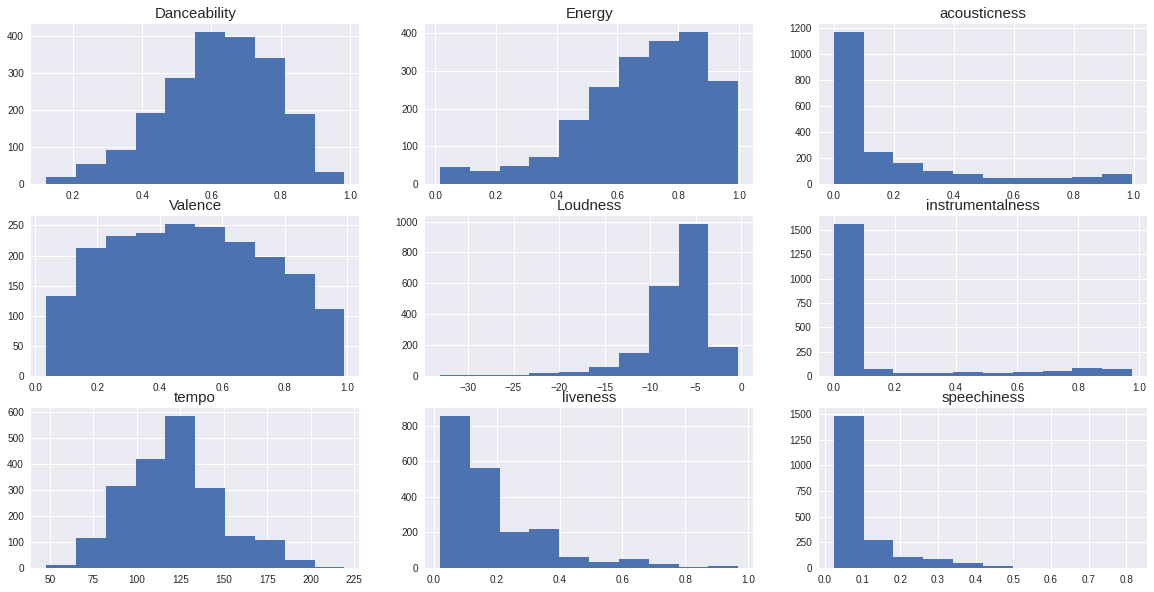

In [45]:
fig,axes = plt.subplots(3,3,figsize=(20,10))

axes[0,0].hist(data['danceability'])
axes[0,0].set_title('Danceability',fontsize=15)
axes[0,1].hist(data['energy'])
axes[0,1].set_title('Energy',fontsize=15)
axes[0,2].hist(data['acousticness'])
axes[0,2].set_title('acousticness',fontsize=15)
axes[1,0].hist(data['valence'])
axes[1,0].set_title('Valence',fontsize=15)
axes[1,1].hist(data['loudness'])
axes[1,1].set_title('Loudness',fontsize=15)
axes[1,2].hist(data['instrumentalness'])
axes[1,2].set_title('instrumentalness',fontsize=15)
axes[2,0].hist(data['tempo'])
axes[2,0].set_title('tempo',fontsize=15)
axes[2,1].hist(data['liveness'])
axes[2,1].set_title('liveness',fontsize=15)
axes[2,2].hist(data['speechiness'])
axes[2,2].set_title('speechiness',fontsize=15)



plt.show()

In [77]:
#For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
%matplotlib inline

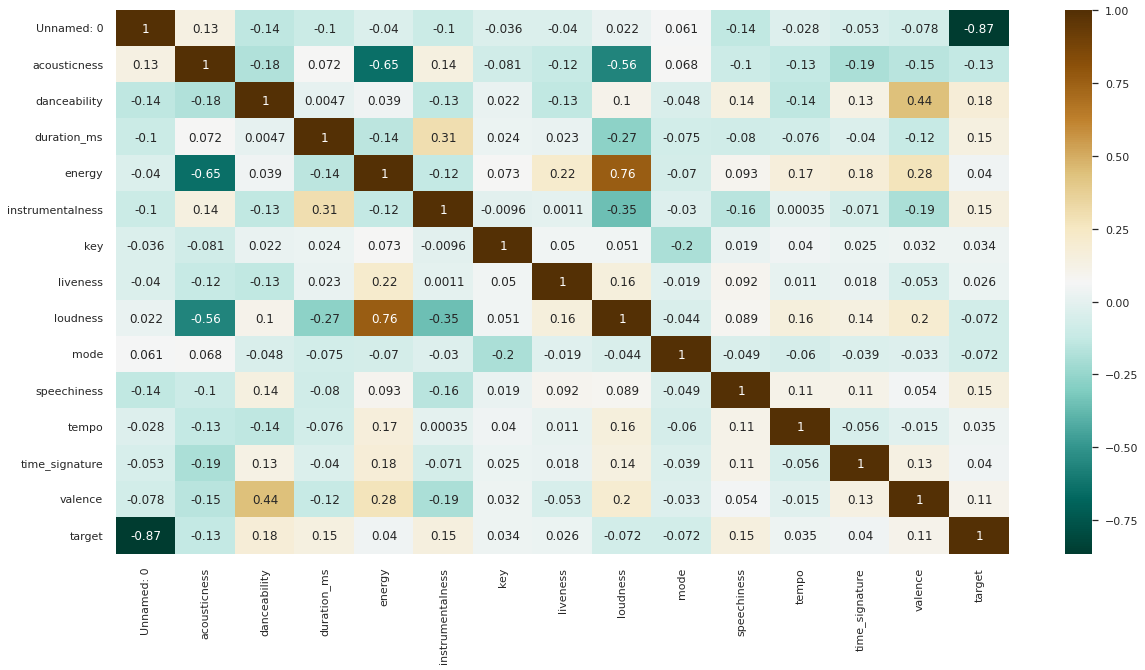

In [78]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
corr = data.corr()
sns.heatmap(corr,annot=True,cmap='BrBG_r',annot_kws={"fontsize":12})

**Observation** As you can see above, year, danceability, energy, loudness and tempo are important features for predicting popularity.

Valence and Danceability are highly related and so is speechiness and Danceability

From the above correlation table we can derive some basic insights as to what attributes make a song more popular.
-  As expected popularity is highly correlated with the year released. This makes sense as the Spotify algorithm which makes this decision generates it's "popularity" metric by not just how many streams a song receives, but also how recent those streams are.

-  Energy also seems to influence a song's popularity. Many popular songs are energetic, though not necessarily dance songs. Because the correlation here is not too high, low energy songs do have some potential to be more popular.

-  Acousticness seems to be uncorrelated with popularity. Most popular songs today have either electronic or electric instruments in them. It is very rare that a piece of music played by a chamber orchestra or purely acoustic band becomes immesely popular (though, again, not impossible).

Other things worth noting:

- Loudness and energy are highly correlated. This makes some sense as energy is definately influence by the volume the music is being played at.

- Acousticness is highly negatively correlated with energy, loudness, and year.

-  Valence and dancability are highly coorelated. Dance songs are usually happier and in a major key

Thus, from this data, it would be better for an artist to create a high energy song with either electric instruments or electronic songs to have the best chance at generating the most popularity.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text major ticklabel objects>)

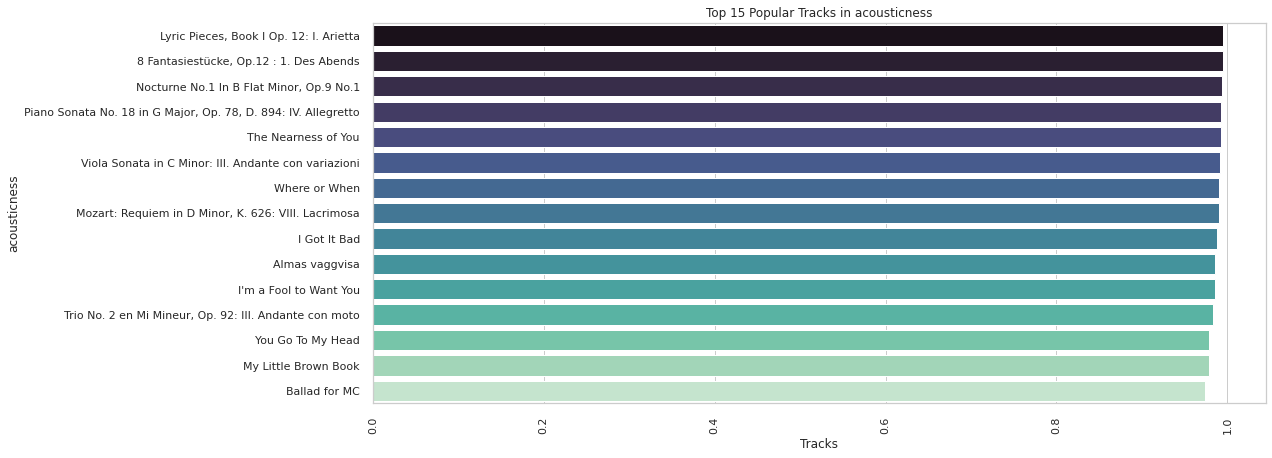

In [80]:
#Most Popular Tracks
fig, axis = plt.subplots(figsize = (16,7))
popular = data.groupby("song_title")['acousticness'].mean().sort_values(ascending=False).head(15)
axis = sns.barplot(popular,popular.index,palette="mako",orient = 'h')
axis.set_title('Top 15 Popular Tracks in acousticness')
axis.set_ylabel('acousticness')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text major ticklabel objects>)

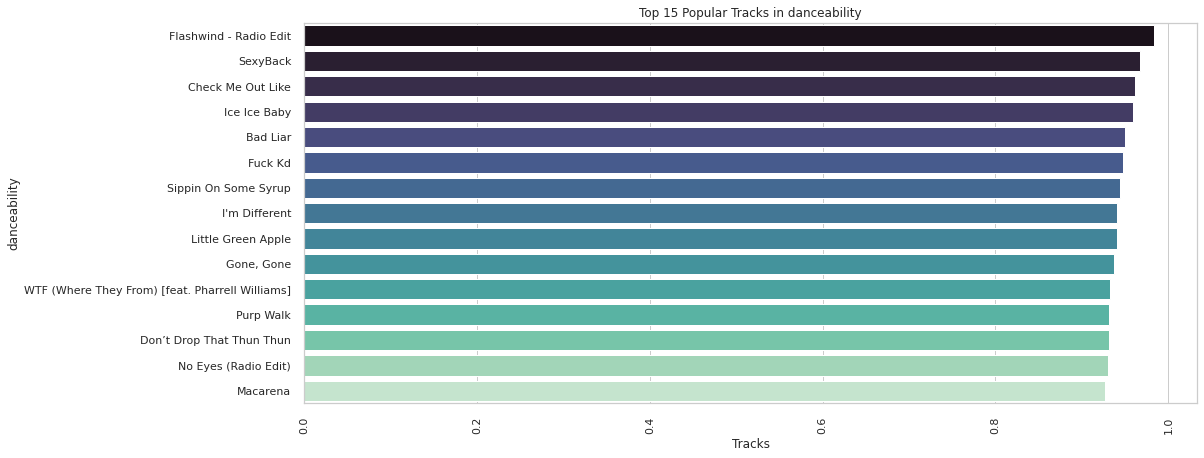

In [81]:
#Most Popular Tracks
fig, axis = plt.subplots(figsize = (16,7))
popular = data.groupby("song_title")['danceability'].mean().sort_values(ascending=False).head(15)
axis = sns.barplot(popular,popular.index,palette="mako",orient = 'h')
axis.set_title('Top 15 Popular Tracks in danceability')
axis.set_ylabel('danceability')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text major ticklabel objects>)

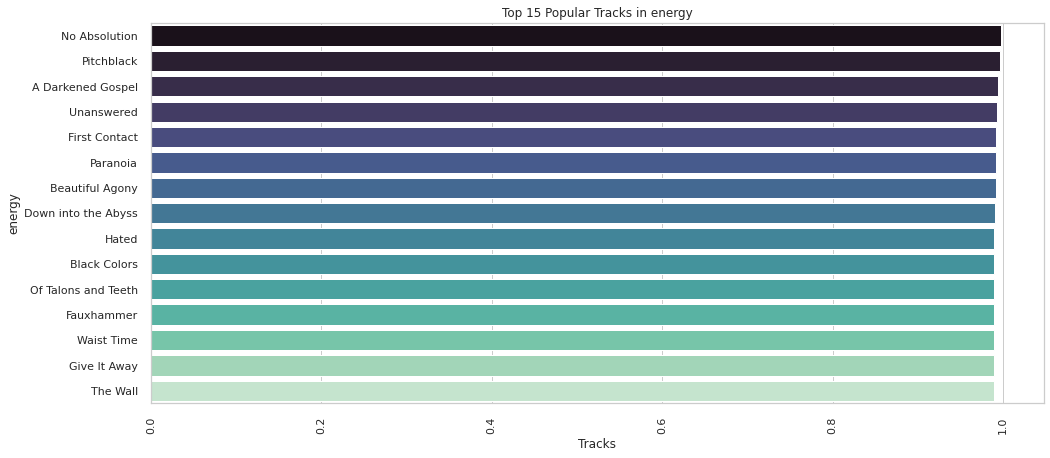

In [82]:
#Most Popular Tracks
fig, axis = plt.subplots(figsize = (16,7))
popular = data.groupby("song_title")['energy'].mean().sort_values(ascending=False).head(15)
axis = sns.barplot(popular,popular.index,palette="mako",orient = 'h')
axis.set_title('Top 15 Popular Tracks in energy')
axis.set_ylabel('energy')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

In [83]:
data.groupby("song_title")['tempo'].mean().sort_values(ascending=False).head(15)


song_title
Lazuli                                                                 219.331
Danger and Dread                                                       209.686
Hannah Hunt                                                            207.969
Puppy Love                                                             203.822
Amazing                                                                202.013
Tupelo - Part 1                                                        200.749
Living Every Dream                                                     200.035
The Shaping Sickness                                                   199.988
Willing & Able                                                         199.727
Mad Love.                                                              199.519
Wake Bake Skate                                                        198.040
Qué Gano Olvidándote - Versión Urbana                                  197.989
Obedear                                  

# Feature Selections

In [56]:
df1 = data

In [57]:
df1.columns 

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [58]:
# 	popularity	danceability	energy	valence	loudness

df1 = df1.drop(columns = ['Unnamed: 0', 'target', 'duration_ms', 'key', 'mode', 'time_signature', 'song_title', 'artist'])

In [63]:
col_features = df1.columns
X = MinMaxScaler().fit_transform(df1[col_features])

In [64]:
kmeans = KMeans(init="k-means++",n_clusters=2,random_state=15).fit(X)

In [65]:
df1['kmeans'] = kmeans.labels_

Text(0.5, 0.92, '3D Scatter Plot of Songs Clustered')

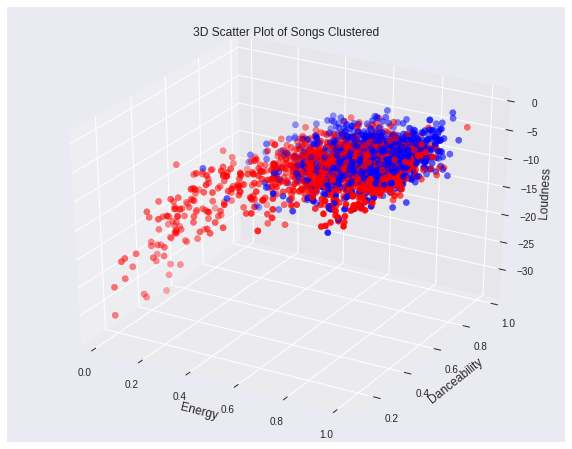

In [66]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = df1['energy']
y = df1['danceability']
z = df1['loudness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z,c=df1['kmeans'],s=40,cmap=cmhot)
ax.set_xlabel('Energy',fontsize=12)
ax.set_ylabel('Danceability',fontsize=12)
ax.set_zlabel('Loudness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")

In [68]:
df1.columns

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'kmeans'],
      dtype='object')

Text(0.5, 0.92, '3D Scatter Plot of Songs Clustered')

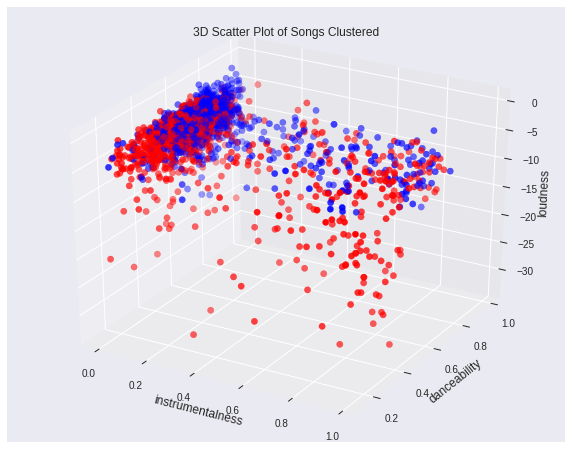

In [71]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = df1['instrumentalness']
y = df1['danceability']
z = df1['loudness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z,c=df1['kmeans'],s=40,cmap=cmhot)
ax.set_xlabel('instrumentalness',fontsize=12)
ax.set_ylabel('danceability',fontsize=12)
ax.set_zlabel('loudness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = df1['instrumentalness']
y = df1['danceability']
z = df1['loudness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z,c=df1['kmeans'],s=40,cmap=cmhot)
ax.set_xlabel('instrumentalness',fontsize=12)
ax.set_ylabel('danceability',fontsize=12)
ax.set_zlabel('loudness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")

Text(0.5, 0.92, '3D Scatter Plot of Songs Clustered')

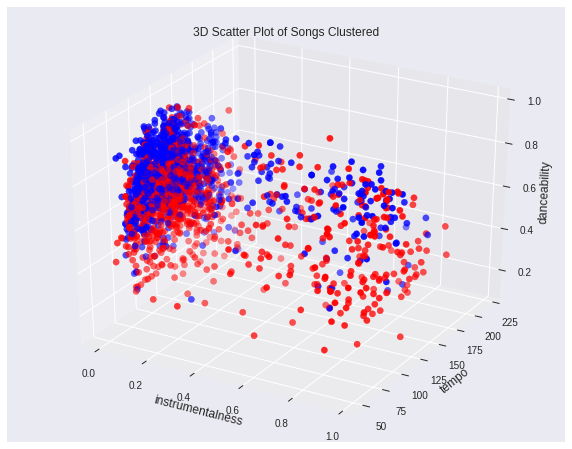

In [72]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = df1['instrumentalness']
y = df1['tempo']
z = df1['danceability']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z,c=df1['kmeans'],s=40,cmap=cmhot)
ax.set_xlabel('instrumentalness',fontsize=12)
ax.set_ylabel('tempo',fontsize=12)
ax.set_zlabel('danceability',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")

Text(0.5, 0.92, '3D Scatter Plot of Songs Clustered')

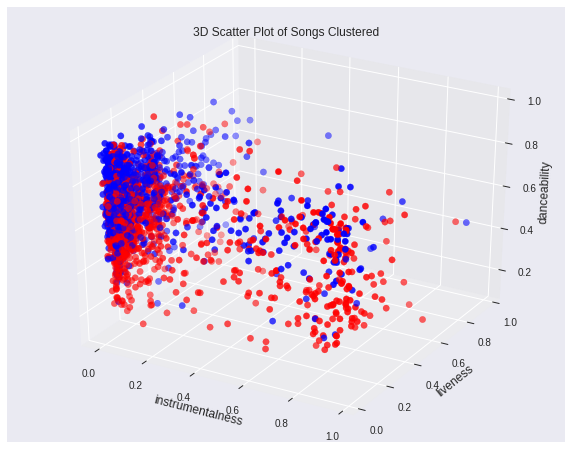

In [73]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = df1['instrumentalness']
y = df1['liveness']
z = df1['danceability']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z,c=df1['kmeans'],s=40,cmap=cmhot)
ax.set_xlabel('instrumentalness',fontsize=12)
ax.set_ylabel('liveness',fontsize=12)
ax.set_zlabel('danceability',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")

In [74]:
df1.groupby(['kmeans']).mean()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
kmeans,,,,,,,,,
0,0.157593,0.676582,0.733977,0.093775,0.186234,-6.465308,0.100146,120.862363,0.713723
1,0.215659,0.564002,0.632546,0.170255,0.195157,-7.666055,0.085664,122.296540,0.293854


In [75]:
cluster_0 = df1[df1['kmeans']==0]
cluster_1  = df1[df1['kmeans']==1]

In [76]:
cluster_0.to_csv("/content/drive/MyDrive/Colab Notebooks/Spotify Mood Recommender ML/Deep Learning/filtered1.csv",index=False)
cluster_1.to_csv("/content/drive/MyDrive/Colab Notebooks/Spotify Mood Recommender ML/data/filtered_track_df.csv",index=False)


OBSERVATIONS :       

From all this cluters created, A new feature selection is created to be fed to the Deep learning model that can be used in prediciting the songs playlists .

- It will be mainly based on music genres' and attributes such as acousticness, danceability, energy, instrumentalness, valence, tempo

- Genre that will be present will be Dance Pop, Electronic, Electropop, Hip Hop, Jazz, K-pop, Latin, Pop, Pop Rap, R&B, Rock

# Model testings

In [21]:
feature_cols=['acousticness', 'danceability', 'duration_ms', 'energy',
              'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
              'speechiness', 'tempo', 'time_signature', 'valence',]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_df =scaler.fit_transform(data[feature_cols])

print(normalized_df[:2])

[[0.01024843 0.82482599 0.19073524 0.4263629  0.02243852 0.18181818
  0.15386234 0.74114059 1.         0.51444066 0.59603317 0.75
  0.26243209]
 [0.19999772 0.72041763 0.3144808  0.35008137 0.00626025 0.09090909
  0.12439486 0.69216224 1.         0.07100517 0.6544742  0.75
  0.57793565]]


Using Cosine Similarity Approach

In [25]:
# Create a pandas series with song titles as indices and indices as series values 
indices = pd.Series(data.index, index=data['song_title']).drop_duplicates()

# Create cosine similarity matrix based on given matrix
cosine = cosine_similarity(normalized_df)



In [26]:
def generate_recommendation(song_title, model_type=cosine ):
    """
    Purpose: Function for song recommendations 
    Inputs: song title and type of similarity model
    Output: Pandas series of recommended songs
    """
    # Get song indices
    index=indices[song_title]
    # Get list of songs for given songs
    score=list(enumerate(model_type[indices['Parallel Lines']]))
    # Sort the most similar songs
    similarity_score = sorted(score,key = lambda x:x[1],reverse = True)
    # Select the top-10 recommend songs
    similarity_score = similarity_score[1:11]
    top_songs_index = [i[0] for i in similarity_score]
    # Top 10 recommende songs
    top_songs=data['song_title'].iloc[top_songs_index]
    return top_songs

In [27]:
print("Recommended Songs:")
print(generate_recommendation('Parallel Lines',cosine).values)

Recommended Songs:
['Inspector Norse' 'Stock Exchange'
 "Let's Lovedance Tonight - Danny Krivit Re-edit - Dk Re-Edit" '200 Press'
 'Ferus Gallery' 'Boys' 'Abataka - Original Mix' 'It Looks Like Love'
 'You & Me - Baauer Remix' 'Johnny Was']


In [28]:
# Create sigmoid kernel matrix based on given matrix
sig_kernel = sigmoid_kernel(normalized_df)

print("Recommended Songs:")
print(generate_recommendation('Parallel Lines',sig_kernel).values)

Recommended Songs:
['Inspector Norse' 'Trap Shit V7' 'GodLovesUgly'
 'Blueberry (Pills & Cocaine) (feat. Danny Brown)'
 'Dreams Never End - 2015 Remastered Version' 'Nimble Girl' 'Lazuli'
 'Fail to Cry' 'Au Seve' 'Giant']
